# Project on Oil vs Banks during recession 

Exploratory Data Analysis of Stock Prices : 

The datasets are generated using pandas-datareader which allows to read the stock information directly from the internet. In this project, we will focus on exploratory data analysis of stock prices.

We all know that the World's oil market is crazy. It has significant effects on the global economy. Several incident between 2007 and 2009 including oil price change from ~ 147 to ~ 32$ a barrel, and global financial crises effected world economy and GDP in 2009. A chain of these incidents caused several leading countries into recession. Let's explore, how the stock price varies from 2006 to 2017 for some of the oil companies and banks in Canada.

In this project, we will also explore the ups and downs in the stock price of The United States Oil Fund (USO) and West Texas Intermediate Light Sweet Crude Oil. The United States Oil Fund is an exchange-traded fund that attempts to track the price of West Texas Intermediate Light Sweet Crude Oil (WTI). WTI is a grade of crude oil used as a benchmark in oil pricing.

In [1]:
import warnings
warnings.simplefilter("ignore")

# Essential imports for data analysis for visualization 
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#import if you want to read the data directly form the API using pandas_datareader
#import pandas_datareader.data as web

# Imports for offline interactive plotting
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()

# Setting style and inline plotting
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
rbc = pd.read_csv('RBC.csv',index_col='Date') # Royal Bank of Canada
cibc = pd.read_csv('CIBC.csv',index_col='Date') # Canadian Imperial Bank of Commerce
bmo = pd.read_csv('BMO.csv',index_col='Date') # Bank of Montreal 
suncor = pd.read_csv('Suncor.csv',index_col='Date') # Suncor Energy Inc.
encana = pd.read_csv('Encana.csv',index_col='Date' ) # Encana Corp.
cnq = pd.read_csv('CNQ.csv',index_col='Date' ) # Canadian Natural Resource Ltd.
uso = pd.read_csv('USO.csv',index_col='Date') # United States Oil Fund LP (ETF)
wti = pd.read_csv('WTI.csv',index_col='Date') # WTI Oil price

In [3]:
cnq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,24.81,25.62,24.81,25.48,2674000
2006-01-04,25.44,26.49,25.20,26.44,2312200
2006-01-05,26.18,26.22,25.58,25.72,1878600
2006-01-06,26.00,26.26,25.80,26.00,1391600
2006-01-09,26.00,26.34,25.77,26.16,1510800


In [4]:
cnq.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,32.35,32.53,32.11,32.16,1672472
2016-12-27,32.21,32.25,31.73,31.99,2724599
2016-12-28,32.06,32.34,31.94,32.21,2160914
2016-12-29,32.15,32.34,31.90,31.97,1566189
2016-12-30,32.08,32.33,31.78,31.88,1163683


In [5]:
#Tickers for the dataset
tickers = ['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana','CNQ']

#Joining data
bo = pd.concat([rbc, cibc, bmo, suncor, encana, cnq], axis=1, keys=tickers)

# Let's see how the data look like
bo.head()

RBC                                CIBC                       \
             Open   High    Low  Close  Volume   Open   High    Low  Close   
Date                                                                         
2006-01-03  38.90  39.75  38.83  39.59  346000  65.61  67.25  65.61  66.98   
2006-01-04  39.74  40.36  39.69  40.34  382200  67.39  67.94  67.20  67.94   
2006-01-05  39.90  39.90  39.40  39.48  261200  67.39  67.75  67.24  67.47   
2006-01-06  39.50  39.59  39.24  39.28  189600  67.57  67.80  67.34  67.74   
2006-01-09  39.02  39.32  38.70  39.00  197200  67.07  67.88  66.98  67.63   

                   ... Encana                                  CNQ         \
           Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date               ...                                                      
2006-01-03  49400  ...  45.40  46.86  45.37  46.70  3852900  24.81  25.62   
2006-01-04  30000  ...  46.10  46.39  45.49  46.30  3926300  25.44  26.49   
2006-01-05  61200  ...  45.75  45.88  44.77  45.22  3941700  26.18  26.22   
2006-01-06  36300  ...  45.83  46.18  45.50  45.86  2786900  26.00  26.26   
2006-01-09  37900  ...  45.95  45.99  45.01  45.05  2878100  26.00  26.34   

                                   
              Low  Close   Volume  
Date                               
2006-01-03  24.81  25.48  2674000  
2006-01-04  25.20  26.44  2312200  
2006-01-05  25.58  25.72  1878600  
2006-01-06  25.80  26.00  1391600  
2006-01-09  25.77  26.16  1510800  

[5 rows x 30 columns]

In [6]:
bo.columns.names = ['Entity','Stock']
bo.columns.names 

FrozenList(['Entity', 'Stock'])

In [7]:
bo.head()

Entity        RBC                                CIBC                       \
Stock        Open   High    Low  Close  Volume   Open   High    Low  Close   
Date                                                                         
2006-01-03  38.90  39.75  38.83  39.59  346000  65.61  67.25  65.61  66.98   
2006-01-04  39.74  40.36  39.69  40.34  382200  67.39  67.94  67.20  67.94   
2006-01-05  39.90  39.90  39.40  39.48  261200  67.39  67.75  67.24  67.47   
2006-01-06  39.50  39.59  39.24  39.28  189600  67.57  67.80  67.34  67.74   
2006-01-09  39.02  39.32  38.70  39.00  197200  67.07  67.88  66.98  67.63   

Entity             ... Encana                                  CNQ         \
Stock      Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date               ...                                                      
2006-01-03  49400  ...  45.40  46.86  45.37  46.70  3852900  24.81  25.62   
2006-01-04  30000  ...  46.10  46.39  45.49  46.30  3926300  25.44  26.49   
2006-01-05  61200  ...  45.75  45.88  44.77  45.22  3941700  26.18  26.22   
2006-01-06  36300  ...  45.83  46.18  45.50  45.86  2786900  26.00  26.26   
2006-01-09  37900  ...  45.95  45.99  45.01  45.05  2878100  26.00  26.34   

Entity                             
Stock         Low  Close   Volume  
Date                               
2006-01-03  24.81  25.48  2674000  
2006-01-04  25.20  26.44  2312200  
2006-01-05  25.58  25.72  1878600  
2006-01-06  25.80  26.00  1391600  
2006-01-09  25.77  26.16  1510800  

[5 rows x 30 columns]

In [8]:
# Max close price
max_stock = bo.xs(key='Close',axis=1,level='Stock').max()
max_stock

Entity
RBC        75.90
CIBC      108.24
BMO        78.03
Suncor     72.95
Encana     96.89
CNQ        53.70
dtype: float64

In [9]:
# min close price
min_stock = bo.xs(key='Close',axis=1,level='Stock').min()
min_stock

Entity
RBC       20.62
CIBC      28.39
BMO       19.51
Suncor    14.66
Encana     3.01
CNQ       13.49
dtype: float64

In [10]:
x=max_stock.index
x

Index(['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana', 'CNQ'], dtype='object', name='Entity')

In [11]:
y=min_stock.values
y

array([20.62, 28.39, 19.51, 14.66,  3.01, 13.49])

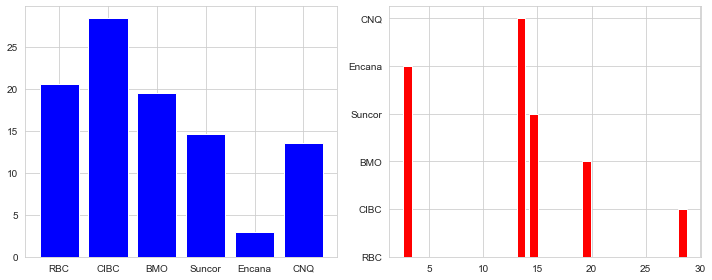

In [28]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10, 4))
axes[0].bar(x,y,color="blue")
axes[1].bar(y,x,color="red")

fig.tight_layout()

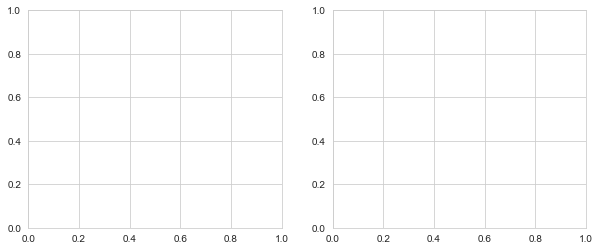

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

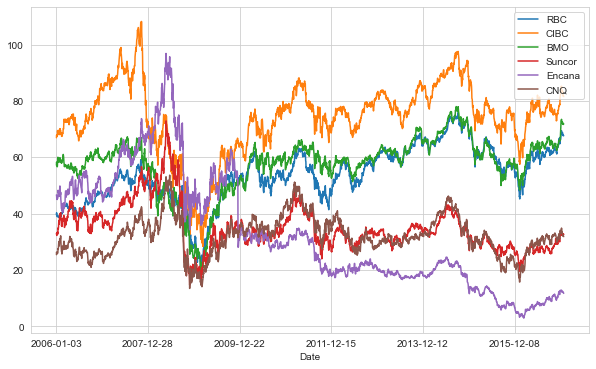

In [14]:
# for loop
for tick in tickers:
    bo[tick]['Close'].plot(figsize=(10,6),label=tick)
plt.legend()

In [15]:
bo.xs(key='Close',axis=1,level='Stock').iplot()

In [16]:
wti.head()

,Value
Date,
2016-12-30,53.75
2016-12-29,53.80
2016-12-28,54.01
2016-12-27,52.82
2016-12-23,52.01


In [17]:
wti.columns = ['Oil Price / Barrel']
wti.head()

,Oil Price / Barrel
Date,
2016-12-30,53.75
2016-12-29,53.80
2016-12-28,54.01
2016-12-27,52.82
2016-12-23,52.01


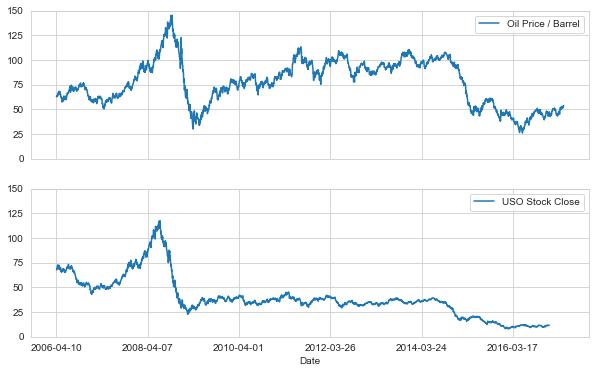

In [18]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 6), sharex=True)
wti[::-1].plot(ax=axes[0],ylim=(0,150))
uso['Close'].plot(ax=axes[1],ylim=(0,150), label = 'USO Stock Close')
plt.legend()

In [19]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bo[tick]['Close'].pct_change()
returns.head()

,RBC Return,CIBC Return,BMO Return,Suncor Return,Encana Return,CNQ Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.018944,0.014333,0.019389,0.010073,-0.008565,0.037677
2006-01-05,-0.021319,-0.006918,-0.014736,-0.023874,-0.023326,-0.027231
2006-01-06,-0.005066,0.004002,-0.005913,0.031269,0.014153,0.010886
2006-01-09,-0.007128,-0.001624,-0.008572,-0.012309,-0.017662,0.006154


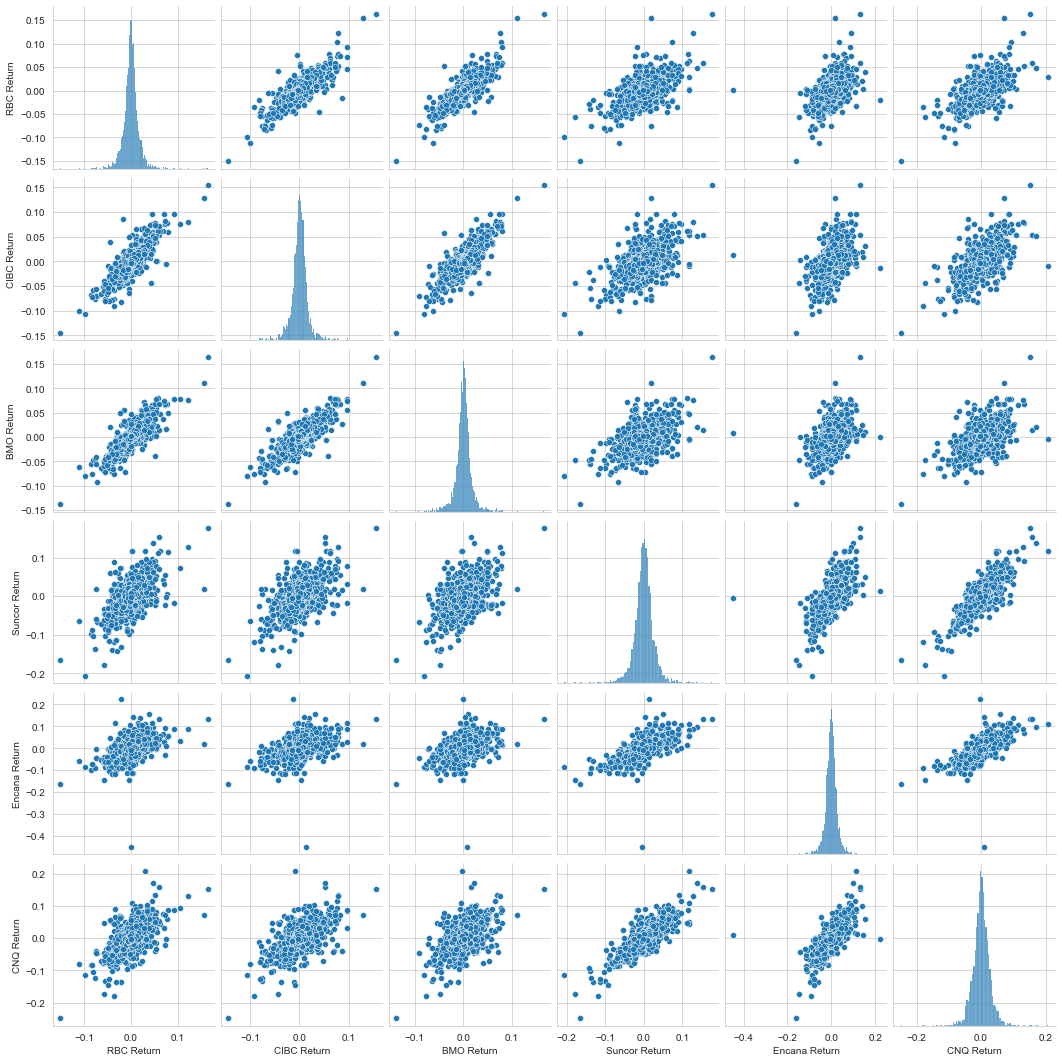

In [20]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:]) # avoiding NaN row

In [21]:
# Best Single day gain
returns.idxmax()

RBC Return       2008-10-13
CIBC Return      2008-10-13
BMO Return       2008-10-13
Suncor Return    2008-10-13
Encana Return    2016-02-24
CNQ Return       2008-11-21
dtype: object

In [22]:
# Worst single day drop 
returns.idxmin()

RBC Return       2008-11-20
CIBC Return      2008-11-20
BMO Return       2008-11-20
Suncor Return    2009-01-20
Encana Return    2009-12-09
CNQ Return       2008-11-20
dtype: object

In [23]:
returns.std()


RBC Return       0.017404
CIBC Return      0.018244
BMO Return       0.016974
Suncor Return    0.026503
Encana Return    0.029234
CNQ Return       0.028247
dtype: float64

In [37]:
returns.loc['2008-01-01':'2008-12-30'].std()

RBC Return       0.031713
CIBC Return      0.036268
BMO Return       0.031502
Suncor Return    0.049237
Encana Return    0.040976
CNQ Return       0.054149
dtype: float64

In [39]:
returns.loc['2016-01-01':'2016-12-30'].std()

RBC Return       0.013636
CIBC Return      0.013055
BMO Return       0.012131
Suncor Return    0.020997
Encana Return    0.046978
CNQ Return       0.027645
dtype: float64

<AxesSubplot:xlabel='CNQ Return', ylabel='Density'>

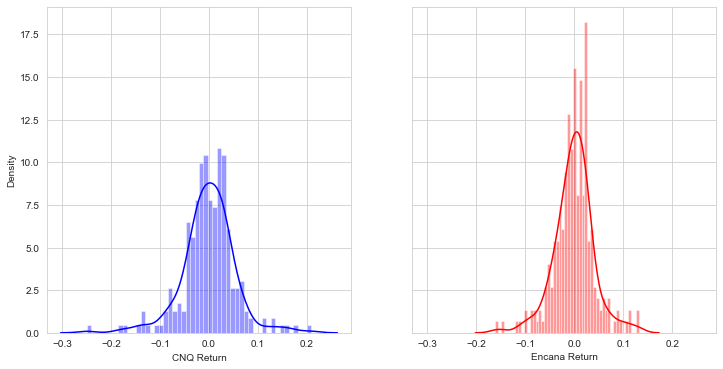

In [40]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
sns.distplot(returns.loc['2008-01-01':'2008-12-30']['Encana Return'],
             color='red',bins=50, ax=axes[1])
sns.distplot(returns.loc['2008-01-01':'2008-12-30']['CNQ Return'], 
             color='blue',bins=50, ax=axes[0])

In [24]:
cnq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2006-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2769 non-null   float64
 1   High    2769 non-null   float64
 2   Low     2769 non-null   float64
 3   Close   2769 non-null   float64
 4   Volume  2769 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 129.8+ KB


<AxesSubplot:xlabel='Entity', ylabel='Entity'>

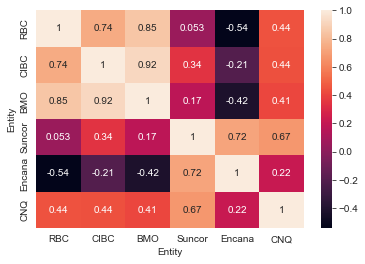

In [25]:
sns.heatmap(bo.xs(key='Close',axis=1,level='Stock').corr(),annot=True)

About the Data!
The code below is used to create the following datasets for this capstone project.
RBC.csv (RBC Royal Bank)
CIBC.csv (CIBC Commercial bank)
BMO.csv (BMO Bank of Montreal)
Suncor.csv (Suncor energy)
Encana.csv (Encana corp.)
USO.csv (United State Oil fund)
WTI.csv (West Texas Intermediate (WTI), also known as Texas light sweet, is a grade of crude oil used as a benchmark in oil pricing.)
How to get the stock data!
Although, the stock data is provided as separate ".csv" files for each of the company/bank. I suggest, follow the steps to directly download the data. If this does not workout for some reasons, you can always read the .csv files!

Install pandas-datareader - pip install pandas-datareader
set start and end datetime objects, "import datetime"
look for the ticker symbols for each company/bank, you can google them.
use datareader to grab the stock information. info on the stock. Try google API.
For your convenience, the code is given below.

#import warnings
#warnings.simplefilter("ignore")
import pandas as pd
import pandas_datareader.data as web
import datetime

** Start and end date for stocks**
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2017, 1, 1)

rbc = web.DataReader('RY', 'google', start, end) #** Royal Bank of Canada
cibc = web.DataReader('CM', 'google', start, end) # Canadian Imperial Bank of Commerce
bmo = web.DataReader('BMO', 'google', start, end) # Bank of Montreal
suncor = web.DataReader('SU', 'google', start, end) # Suncor Energy Inc.
encana = web.DataReader('ECA', 'google', start, end) # ** Encana Corp.
cnq = web.DataReader('CNQ', 'google', start, end) # ** Canadian Natural Resource Ltd.
cvx = web.DataReader('CVX', 'google', start, end) # ** Chevron Corporation
bac = web.DataReader('BAC', 'google', start, end) # ** Bank of America
uso = web.DataReader('USO', 'google', start, end) # ** United States Oil Fund LP (ETF)
wti = web.DataReader('EIA/PET_RWTC_D', 'quandl', start, end) #** WTI Oil price **

If you want to save them as .csv files
rbc.to_csv('RBC.csv')
cibc.to_csv('CIBC.csv')
bmo.to_csv('BMO.csv')
suncor.to_csv('Suncor.csv')
encana.to_csv('Encana.csv')
cnq.to_csv('CNQ.csv')
cvx.to_csv('CVX.csv')
bac.to_csv('BAC.csv')
uso.to_csv('USO.csv')
wti.to_csv('WTI.csv')